In [3]:
import json
with open('hw4_data.json', 'r') as file:
    data = json.load(file)
nodes=data['nodes']
edges=data['edges']

[['Yanyan-Wang', 50.95], ['Aarebecca', 23.82], ['pomelo-nwu', 22.36], ['tyn1998', 16.64], ['frank-zsy', 15.8], ['will-ww', 13.5], ['zhicheng-ning', 8.35], ['xgdyp', 7.58], ['stevending1st', 6.28], ['andyhuang18', 6.27], ['Zzzzzhuzhiwei', 6.21], ['wxharry', 4.79], ['bifenglin', 4.01], ['yangzy0603', 3.83], ['lidongze0629', 3.73], ['wj23027', 3.56], ['PureNatural', 3.37], ['kunal8411', 3.36], ['birdflyi', 3.28], ['lhbvvvvv', 3.12], ['xiaoya-yaya', 2.39], ['stealth-bombeer', 2.36], ['yikenie', 2.31], ['RackweLLizm', 2.28], ['pranavshuklaa', 1.79], ['Vlad116', 1.79], ['Maple0817', 1.63], ['yvonneyx', 1.22], ['yubo0923', 1.12], ['zhaosj975', 1], ['longyanz', 0.74]]
[['Yanyan-Wang', 'Aarebecca', 25.3], ['Yanyan-Wang', 'pomelo-nwu', 25.09], ['Aarebecca', 'pomelo-nwu', 24.84], ['andyhuang18', 'tyn1998', 15.28], ['yangzy0603', 'pomelo-nwu', 13.85], ['bifenglin', 'will-ww', 13.32], ['tyn1998', 'pomelo-nwu', 12.48], ['yangzy0603', 'Aarebecca', 11.92], ['tyn1998', 'frank-zsy', 11.87], ['yangzy0603

In [6]:
from collections import defaultdict

adjacency_dict = defaultdict(list)

for edge in edges:
    user1, user2, weight = edge
    adjacency_dict[user1].append(user2)
    adjacency_dict[user2].append(user1)

direct_friends = {user[0]: adjacency_dict[user[0]] for user in nodes}

print(direct_friends)

{'Yanyan-Wang': ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin'], 'Aarebecca': ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy'], 'pomelo-nwu': ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975'], 'tyn1998': ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0629', 'yvonneyx', 'ste

In [14]:

degree_count = {user[0]: len(adjacency_dict[user[0]]) for user in nodes}

top_5_degrees = sorted(degree_count.items(), key=lambda x: x[1], reverse=True)[:5]

top_5_influence = sorted(nodes, key=lambda x: x[1], reverse=True)[:5]

general_influence={user[0]:degree_count[user[0]]+user[1] for user in nodes}
top_5_general_influence= sorted(general_influence,key=lambda x:x[1],reverse=True)[:5]
print(top_5_degrees)
print(top_5_influence)
print(top_5_general_influence)

[('tyn1998', 30), ('frank-zsy', 30), ('pomelo-nwu', 24), ('andyhuang18', 23), ('wj23027', 23)]
[['Yanyan-Wang', 50.95], ['Aarebecca', 23.82], ['pomelo-nwu', 22.36], ['tyn1998', 16.64], ['frank-zsy', 15.8]]
['Zzzzzhuzhiwei', 'tyn1998', 'wxharry', 'yvonneyx', 'PureNatural']


In [38]:
yanyan_friends = direct_friends["Yanyan-Wang"]

friends_of_friends = set()

for friend in yanyan_friends:
    friends_of_friends.update(adjacency_dict[friend])

friends_of_friends.difference_update(yanyan_friends)
friends_of_friends.discard("Yanyan-Wang") 

fof_count = {user: len(set(adjacency_dict[user]).intersection(yanyan_friends)) for user in friends_of_friends}
recommended_friends = sorted(fof_count.items(), key=lambda x: x[1], reverse=True)

def find_max(arr):
    result=[]
    max=arr[0][1]
    for i in range(0,len(arr)-1):
        if arr[i][1]==max:
            result.append(arr[i][0])
        else:
            break
    print(result)

find_max(recommended_friends)



SyntaxError: incomplete input (3562975349.py, line 28)

In [41]:
yan_connection={}
for edge in edges:
    user1,user2,value=edge
    if user1=='Yanyan-Wang':
        yan_connection[user2]=value
    elif user2 =='Yanyan-Wang':
        yan_connection[user1]=value
top_5_connection=sorted(yan_connection.items(),key=lambda x:x[1],reverse=True)[:5]
print(top_5_connection)

{'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}
[('Aarebecca', 25.3), ('pomelo-nwu', 25.09), ('yangzy0603', 11.85), ('tyn1998', 9.62), ('yvonneyx', 7.39)]


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

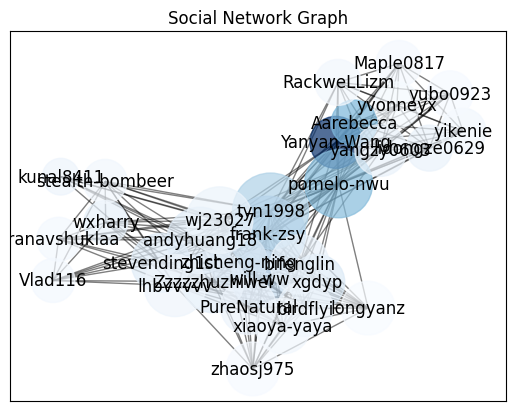

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for user in nodes:
    G.add_node(user[0], influence=user[1])

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

pos = nx.spring_layout(G) 
influence = nx.get_node_attributes(G, 'influence')
sizes = [degree_count[user] * 100 for user in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=list(influence.values()), cmap='Blues', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.title("Social Network Graph")
plt.colorbar(label='Influence Score')
plt.show()
